In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/faults/dust.jpg
/kaggle/input/faults/thumb.jpg


In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 15.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yK9Do9bsUfj9uebcleOg")
project = rf.workspace("6rainstorm-yqytq").project("solar-panel-faulty-detection")
version = project.version(5)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Solar-Panel-Faulty-Detection-5 in yolov8:: 100%|██████████| 7284/7284 [00:01<00:00, 6264.94it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
!yolo train model=yolov8s.pt data='/kaggle/working/Solar-Panel-Faulty-Detection-5/data.yaml' epochs=100 imgsz=640 batch=32  augment=True

100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 120MB/s]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/Solar-Panel-Faulty-Detection-5/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

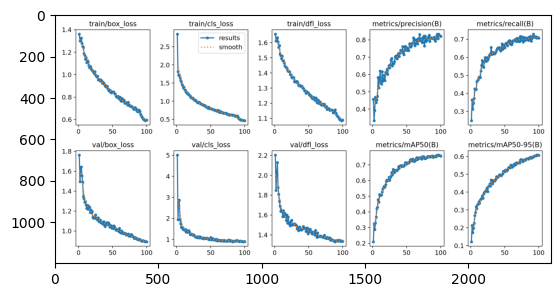

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/kaggle/working/runs/detect/train/results.png')
imgplot = plt.imshow(img)
plt.show()

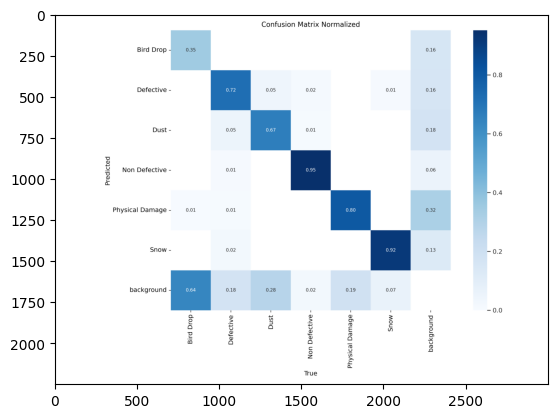

In [6]:
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix_normalized.png')
imgplot = plt.imshow(img)
plt.show()

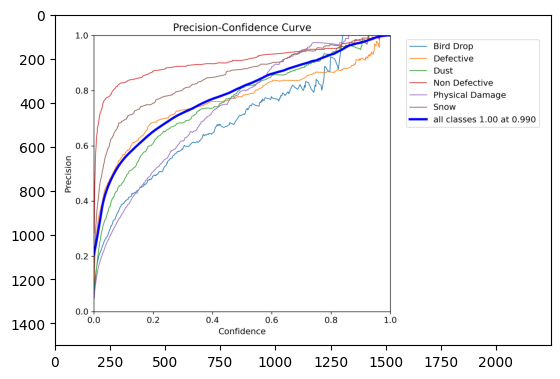

In [7]:
img = mpimg.imread('/kaggle/working/runs/detect/train/P_curve.png')
imgplot = plt.imshow(img)
plt.show()

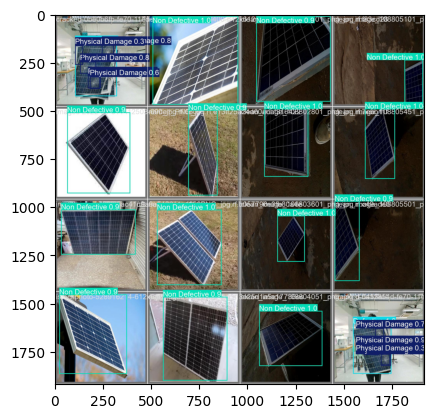

In [8]:
img = mpimg.imread('/kaggle/working/runs/detect/train/val_batch0_pred.jpg')
imgplot = plt.imshow(img)
plt.show()

In [9]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" device=0 source="/kaggle/working/Solar-Panel-Faulty-Detection-5/test/images" save=True

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

image 1/331 /kaggle/working/Solar-Panel-Faulty-Detection-5/test/images/1-102-_jpg.rf.5f8b08b27e5da0fca66f6f2d6fe9e546.jpg: 640x640 1 Defective, 5 Non Defectives, 1 Snow, 16.3ms
image 2/331 /kaggle/working/Solar-Panel-Faulty-Detection-5/test/images/1-103-_jpg.rf.d498059c04ce9e493dd1956079d1fb94.jpg: 640x640 11 Defectives, 48 Snows, 16.3ms
image 3/331 /kaggle/working/Solar-Panel-Faulty-Detection-5/test/images/1-123-_jpg.rf.85f4ca546d73af85fe3050a382a43305.jpg: 640x640 1 Defective, 3 Snows, 16.2ms
image 4/331 /kaggle/working/Solar-Panel-Faulty-Detection-5/test/images/1-2-_jpg.rf.c7342cae801e9470ac83a624e1492559.jpg: 640x640 4 Defectives, 20 Dusts, 16.2ms
image 5/331 /kaggle/working/Solar-Panel-Faulty-Detection-5/test/images/1-34-_jpg.rf.3bc72c526529ec505cea1a6392947ad0.jpg: 640x640 1 Defective, 1 Dust, 16.2ms
image 6/331 /kag

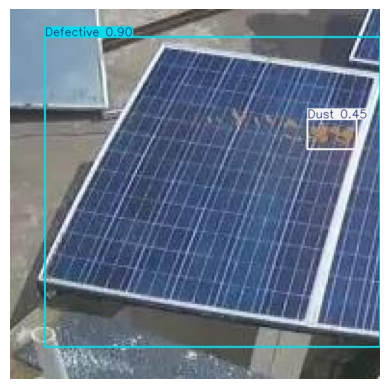

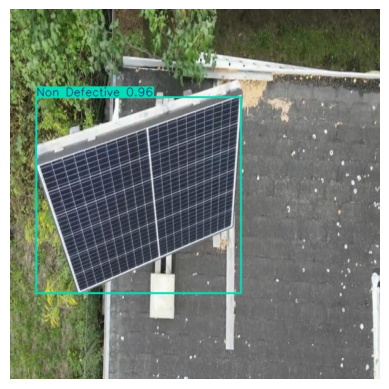

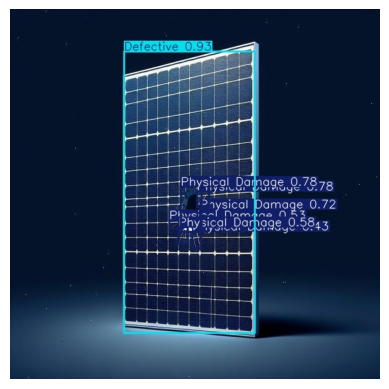

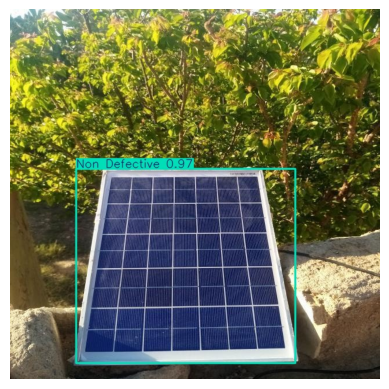

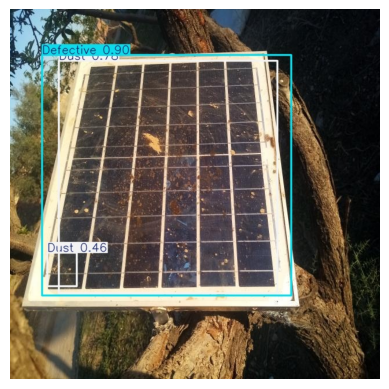

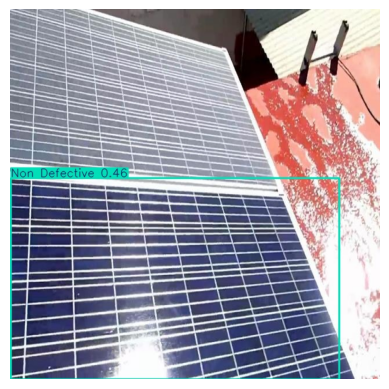

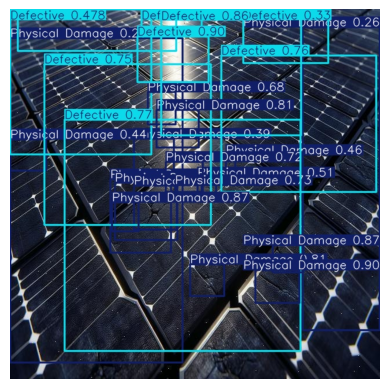

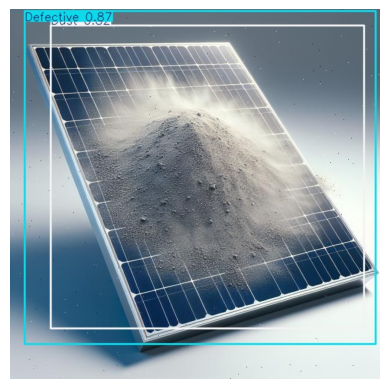

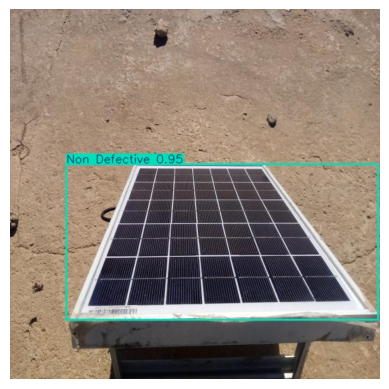

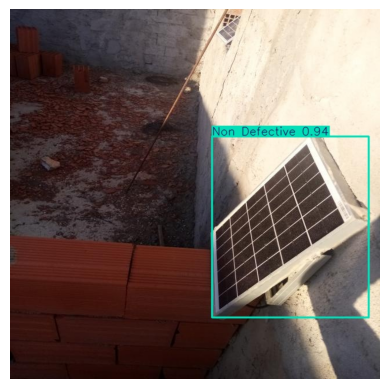

In [10]:
from glob import glob
from PIL import Image
import numpy as np

img_path = glob('/kaggle/working/runs/detect/predict/*.jpg')
img_path = np.random.choice(img_path, 10)

for image_path in img_path:
    plt.imshow(Image.open(image_path))
    plt.axis("off")
    plt.show()
    print("\n")

In [11]:
!yolo predict model="/kaggle/working/runs/detect/train/weights/best.pt", source="/kaggle/input/dustss/original.jpg"

WARNING ⚠️ argument 'model=/kaggle/working/runs/detect/train/weights/best.pt,' does not require trailing comma ',', updating to 'model=/kaggle/working/runs/detect/train/weights/best.pt'.
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /kaggle/input/dustss/original.jpg: 640x640 1 Defective, 3 Dusts, 16.2ms
Speed: 2.7ms preprocess, 16.2ms inference, 178.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


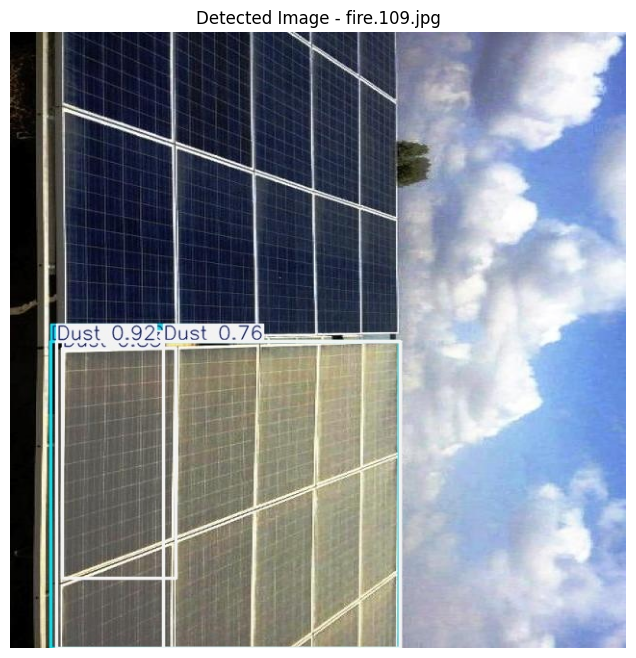

In [12]:
import cv2
import matplotlib.pyplot as plt

# Path to the output image
output_image_path = "/kaggle/working/runs/detect/predict2/original.jpg"  

# Load the output image
output_image = cv2.imread(output_image_path)
output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)  

# Display the output image
plt.figure(figsize=(8, 8))
plt.imshow(output_image)
plt.title('Detected Image - fire.109.jpg')
plt.axis('off')  # Hide axes
plt.show()

In [13]:
!yolo predict model="/kaggle/working/runs/detect/train/weights/best.pt", source="/kaggle/input/faults/thumb.jpg"

WARNING ⚠️ argument 'model=/kaggle/working/runs/detect/train/weights/best.pt,' does not require trailing comma ',', updating to 'model=/kaggle/working/runs/detect/train/weights/best.pt'.
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /kaggle/input/faults/thumb.jpg: 640x640 3 Bird Drops, 1 Defective, 16.2ms
Speed: 4.1ms preprocess, 16.2ms inference, 169.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


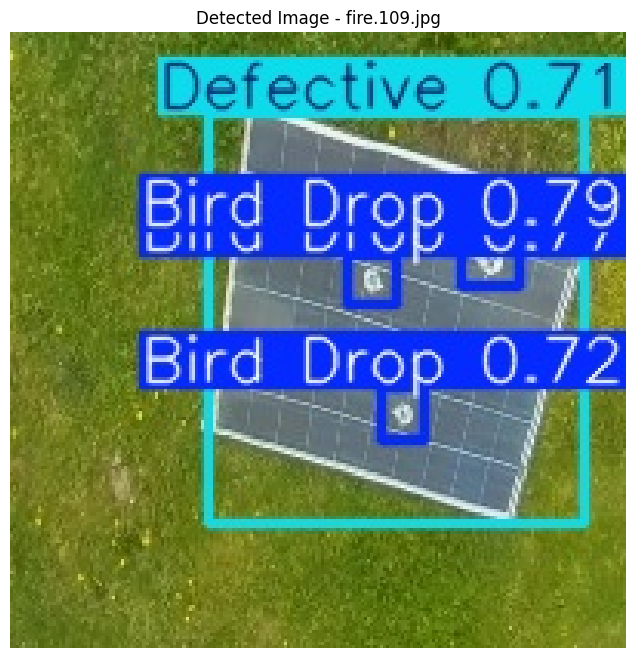

In [14]:
import cv2
import matplotlib.pyplot as plt

# Path to the output image
output_image_path = "/kaggle/working/runs/detect/predict3/thumb.jpg"  

# Load the output image
output_image = cv2.imread(output_image_path)
output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)  

# Display the output image
plt.figure(figsize=(8, 8))
plt.imshow(output_image)
plt.title('Detected Image - fire.109.jpg')
plt.axis('off')  # Hide axes
plt.show()